<a href="https://colab.research.google.com/github/leila-orouji/Tutorial-Image-Processing/blob/master/image_procesing_thresholding_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

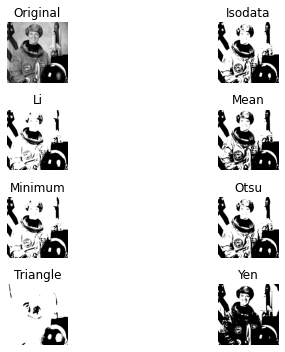

In [ ]:
# Thresholding
# 1- global or histogram based - good for uniform background
# 2- local or adaptive - for uneven background illumination
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
#  to obtain all the image results :
#  fig, ax = try_all_threshold(image, verbos=False)


# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

from skimage import data
astronaut_image = data.astronaut()

# Turn the fruits_image to grayscale
grayscale = rgb2gray(astronaut_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

In [ ]:
#  Global / uniform background
from skimage.filters import threshold_otsu

# import opencv
import cv2

#  Obtain the optimal theshold value
thresh = threshold_otsu(grayscale)
print (thresh)
# Apply thresholding to the image
#  binary_global = threshold_otsu > thresh
max_val=255
fig, ax = cv2.threshold(grayscale, thresh, max_val, cv2.THRESH_BINARY_INV)

# Show the resulting plots
plt.show()

# #  Local / uneven background
# from skimage.filters import threshold_local

# # set the block size to 35
# block_size = 35

# #  Obtain the optimal local theshold
# local_thresh = threshold_local(grayscale, block_size, offset=10)

# # Apply thresholding to the image
# # binary_global = threshold_otsu > thresh

0.388671875


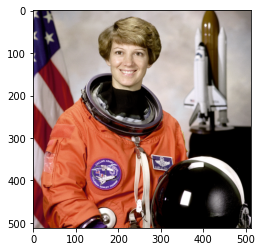

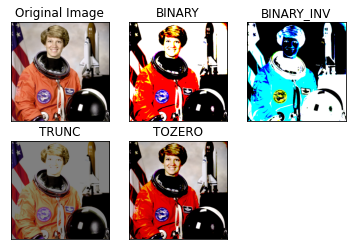

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
astronaut_image = data.astronaut()

img = data.astronaut()
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.imshow(img)
plt.show()

for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


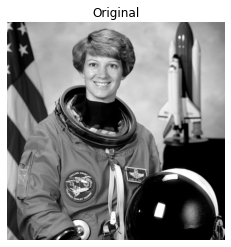

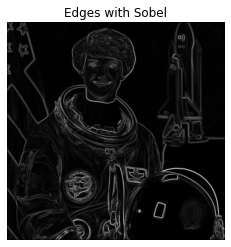

In [ ]:
# Filtering :
#  enhancing an image, emphasize and remove features, smoothing, sharpening,edge detection


#  Edge detection : sobel

# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
astronaut_image_gray = color.rgb2gray(astronaut_image)

# Apply edge detection filter
edge_sobel = sobel(astronaut_image_gray)

# Visualizing images
def show_image(image, title='Image', cmap_type='gray'): 
  plt.imshow(image, cmap=cmap_type) 
  plt.title(title) 
  plt.axis('off') 
  plt.show()

# Show original and resulting image to compare
show_image(astronaut_image_gray, 'Original', cmap_type='gray')
show_image(edge_sobel, 'Edges with Sobel', cmap_type='gray')


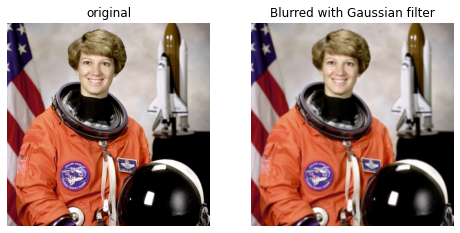

In [ ]:
# Gaussian smoothing 

def plot_comparison(original, filtered, title_filtered): 
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True) 
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off') 
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')


# Import the module and function 
from skimage.filters import gaussian 

# Apply edge detection filter 
gaussian_image = gaussian(astronaut_image, multichannel=True) 

# Show original and resulting image to compare 
plot_comparison(astronaut_image, gaussian_image, "Blurred with Gaussian filter")

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


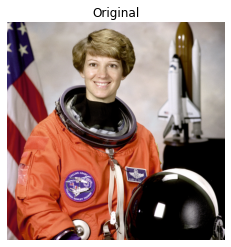

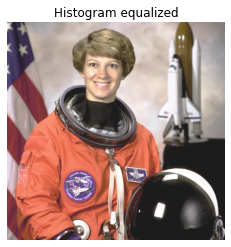

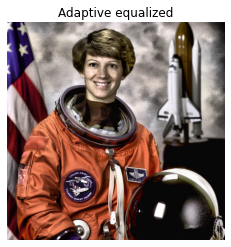

In [ ]:
# Contrast enhancement
# Enhance contrast : Contrast stretching , Histogram equalization
# Types:  Histogram equalization , Adaptive histogram equalization (Contrast Limited Adaptive Histogram Equalization (CLAHE))


# Histogram equalization 
from skimage import exposure

# Obtain the equalized image 
image_eq = exposure.equalize_hist(astronaut_image) 

# Show original and result 
show_image(astronaut_image, 'Original') 
show_image(image_eq, 'Histogram equalized')


# CLAHE in scikit-image 
from skimage import exposure 

# Apply adaptive Equalization 
image_adapteq = exposure.equalize_adapthist(astronaut_image, clip_limit=0.03) 

# Show result 
show_image(image_adapteq, 'Adaptive equalized')